In [ ]:
Text Classification :  
is an automated process of classification of text into predefined categories. 
It is an example of supervised machine learning task since a labelled dataset 
containing text documents and their labels is used for train a classifier. 

Some examples of text classification are:                                                                                   
-Understanding audience sentiment from social media,                                                                         
-Detection of spam and non-spam emails,                                                                                     
-Auto tagging of customer queries,                                                                                            
-Categorization of news articles into defined topics(Politics, Stock Market, Sports)                                          

#### Import libraries

In [162]:
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet as wn

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import decomposition, ensemble 
import xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

#### Set random seed

In [163]:
# This is used to reproduce the same result every time if the script is kept consistent otherwise each run will produce 
# different results. The seed can be set to any number.

np.random.seed(500)

In [164]:
data = pd.read_csv('corpus.csv', encoding='latin-1')          # read the dataset

In [165]:
data.head()

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2


### Data preprocessing

In [ ]:
-1st remove punctuation using re -'regular expression'                                                                        
-lower all the words                                                                                                          
-get a list of words using split() remove space                                                                               
-then remove stopwords of 'corpus.stopwords' libraray and also use 'lem.lemmatize(word)' maps words into root form          
-then join all the words                                                                                                       
-and append into corpus list.                                                        

In [166]:
import re
lem = WordNetLemmatizer()  # used when meaning of word is important    
ps = PorterStemmer()       # we can also use 'ps.stem()' , But its used when meaning of word is not important

corpus=[]

for i in range(len(data['text'])):
    punctuation_removal = re.sub('[^a-zA-Z]', ' ', data.text[i])    
    word_lower = punctuation_removal.lower()           
    list_words = word_lower.split()
    stopword_removal = [lem.lemmatize(word) for word in list_words if not word in set(stopwords.words('english'))]
    words_join = ' '.join(stopword_removal)
    corpus.append(words_join)

In [167]:
print('corpus : \n', corpus[0])                           
print('\nOriginal text data : \n', data['text'][0])

corpus : 
 stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate video game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen

Original text data : 
  Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate video game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


In [168]:
data['corpus'] = corpus       # Now we append 'corpus' text into data DF

data = data.drop('text', axis=1)   # and remove 'text' coulmn not needed now

In [169]:
data.head()

,label,corpus
0,__label__2,stuning even non gamer sound track beautiful p...
1,__label__2,best soundtrack ever anything reading lot revi...
2,__label__2,amazing soundtrack favorite music time hand in...
3,__label__2,excellent soundtrack truly like soundtrack enj...
4,__label__2,remember pull jaw floor hearing played game kn...


### Split the dataset into train and test

In [170]:
X_train, X_test, y_train, y_test = train_test_split(data['corpus'], data['label'], test_size=0.3)

In [171]:
# label encoder , for the y- target var. 'label'    

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

### Word Vectorization -> Tf-IDF vector

In [172]:
# we can also use CountVectorizer, But TF_IDF vectorizer is more importance.

tf = TfidfVectorizer(max_features=5000) 

tf.fit(data['corpus'])     # fit the whole data of 'corpus'

X_train_tf = tf.transform(X_train)    # then transform both
X_test_tf = tf.transform(X_test)

In [1]:
# tf.vocabulary_           # gives vocabulary in dict{} form , we have fit the TFidfVector on 'tf'

# print(len(tf.vocabulary_))   # 5000 , bcoz we have use (max_features=5000) above

In [2]:
# see the vectorized data, 
# 1: Row number of ‘X_train’,
# 2: Unique Integer number of each word in the first row,
# 3: Score calculated by TF-IDF Vectorizer 

# print(X_train_tf)

## Build the Model

#### Naive Bayes

In [176]:
naive = naive_bayes.MultinomialNB()   # initialize the model

naive.fit(X_train_tf, y_train)

naive_predict = naive.predict(X_test_tf)

In [177]:
print(f'Accuracy Score of Naive Bayes Classifier is : {accuracy_score(y_test, naive_predict) : 0.2%}')

Accuracy Score of Naive Bayes Classifier is :  83.70%


#### SVM

In [178]:
model = svm.SVC(C=1, kernel='linear', degree=3, gamma='auto')

model.fit(X_train_tf, y_train)

svm_predict = model.predict(X_test_tf)

In [179]:
print(f'Accuracy Score of SVM is : {accuracy_score(svm_predict, y_test) : 0.2%}')

Accuracy Score of SVM is :  85.03%


## ----------------------------------------------------------------------------------------

### Predict th model

#####  Here we used 'svm model'  for prediction

In [198]:
# 1st taken 'text' in comment , 2nd transform using 'tf' of TFidfVector we trained on 'corpus' , 3rd preddict that 'vect'

comment1 = ['Glorious story: I loved Whisper of the wicked saints. The story was amazing and I was pleasantly surprised at the changes in the book. I am not normaly someone who is into romance novels, but the world was raving about this book and so I bought it. I loved it !! This is a brilliant story because it is so true. This book was so wonderful that I have told all of my friends to read it. It is not a typical romance, it is so much more. Not reading this book is a crime, becuase you are missing out on a heart warming story.']

vect1 = tf.transform(comment1)     

pred1 = model.predict(vect1)       # shows the label in array form
pred1

array([1])

In [199]:
list(encoder.inverse_transform([1]))          # we can inverse transform - array 1 we got in prediction , into label 

['__label__2 ']

In [200]:
data['corpus'][7]

'glorious story loved whisper wicked saint story amazing pleasantly surprised change book normaly someone romance novel world raving book bought loved brilliant story true book wonderful told friend read typical romance much reading book crime becuase missing heart warming story'

#### -----------------------------------

##### Here we used 'naive bayes model' for prediction 

In [208]:
comment2 = [" Buyer beware: This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's family and friends--or perhaps, by herself! I can't imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a ""worst book"" contest. I can't believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on ""To Kill a Mockingbird""--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in a mood to send a book to someone as a joke---stay far, far away from this one!"]

vect2 = tf.transform(comment2)     

pred2 = naive.predict(vect2)     # shows the label in array form
pred2

array([0])

In [209]:
list(encoder.inverse_transform([0]))        # then inverse transform the array into label

['__label__1 ']

In [212]:
data['corpus'][6]
data['label'][6]

'__label__1 '

#### -------------------------------------

### Create Cloud of 'Corpus' text

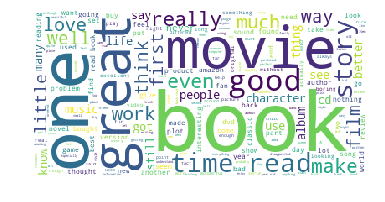

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


cloud = WordCloud(background_color='white').generate(str(corpus))    # Remeber 'corpus' in str() form

plt.imshow(cloud)
plt.axis('off')
plt.show()